In [1]:
!pip install -Uqq fastai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 32.7 MB/s eta 0:00:00


In [2]:
from fastai.vision.all import *

In [3]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:

%cd /content/drive/MyDrive/Dataset/Fruit_recognizer

/content/drive/MyDrive/Dataset/Fruit_recognizer


In [5]:
version = 4
img_path = 'test_images'
model_path = f'models/fruit-recognizer-v{version}.pkl'

In [6]:
model = load_learner(model_path)

In [12]:
# load the pickle file
with open("fruits", "rb") as fp:
    fruits_list = pickle.load(fp)
fruits_list

['Mangoes',
 'Apples',
 'Pineapples',
 'Oranges',
 'Papaya',
 'Watermelon',
 'Muskmelon',
 'Blackberry',
 'Litchi',
 'Grapes',
 'Kiwi',
 'Plums',
 'Peaches',
 'Strawberries',
 'Tomato',
 'Cherry',
 'Bael',
 'Cucumber',
 'Mulberry',
 'Ice Apple']

# Inference 1

Target mango

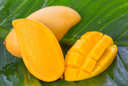

In [13]:
img = Image.open(f'{img_path}/mango.jpg')
img.to_thumb(128,128)

In [14]:
model.predict(f'{img_path}/mango.jpg')

('Mangoes',
 tensor(9),
 tensor([4.4121e-06, 1.4364e-05, 2.9692e-07, 6.4552e-07, 1.2576e-05, 1.3521e-07,
         1.1541e-04, 2.0169e-06, 5.1082e-07, 9.8455e-01, 4.0444e-07, 5.2067e-04,
         1.6116e-03, 1.2929e-02, 6.8224e-06, 3.9616e-06, 7.3593e-05, 1.3351e-07,
         1.3307e-06, 1.5395e-04]))

# inference target apple

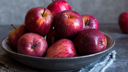

In [15]:
img = Image.open(f'{img_path}/apple.jpg')
img.to_thumb(128,128)

In [16]:
model.predict(f'{img_path}/apple.jpg')

('Apples',
 tensor(0),
 tensor([9.9105e-01, 1.1473e-06, 5.0856e-06, 6.8626e-06, 7.5026e-07, 7.6421e-07,
         5.1830e-06, 1.4014e-05, 1.2645e-03, 1.8876e-05, 5.4128e-07, 3.4683e-07,
         1.2748e-06, 4.1971e-08, 4.8856e-05, 5.5536e-07, 5.7156e-03, 1.7748e-03,
         8.8659e-05, 2.6209e-06]))

# inference target litchi

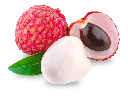

In [17]:
img = Image.open(f'{img_path}/litchi.jpg')
img.to_thumb(128,128)

In [18]:
model.predict(f'{img_path}/litchi.jpg')

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


('Litchi',
 tensor(8),
 tensor([1.6621e-04, 6.9531e-06, 2.5828e-05, 3.9154e-05, 2.8469e-05, 1.4231e-04,
         3.3420e-03, 8.5876e-05, 9.9076e-01, 1.3054e-03, 2.0123e-04, 2.3612e-04,
         2.2644e-04, 7.0172e-05, 1.5845e-03, 2.8325e-05, 1.4798e-03, 2.0794e-04,
         3.8809e-06, 5.6026e-05]))

# infernce target cucumber

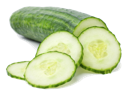

In [19]:
img = Image.open(f'{img_path}/cucumber.jpg')
img.to_thumb(128,128)

In [20]:
model.predict(f'{img_path}/cucumber.jpg')

('Cucumber',
 tensor(4),
 tensor([1.4223e-08, 1.8091e-08, 1.8536e-09, 1.3631e-09, 9.9998e-01, 3.3778e-10,
         1.3713e-09, 7.6380e-07, 1.9045e-09, 5.0787e-07, 3.8272e-08, 2.7285e-06,
         3.9665e-10, 5.4209e-07, 1.3126e-10, 6.0730e-08, 4.6385e-09, 3.0669e-08,
         4.6371e-09, 1.0617e-05]))

In [24]:
from PIL import Image
import numpy as np

# Load your image (assuming img_path is the path to your image)

# Convert RGBA to RGB
if img.mode == 'RGBA':
    img = img.convert('RGB')

# Convert image to a numpy array and preprocess as needed for your model
img_array = np.array(img)

pred, idx, probs = model.predict(img_array)
dict(zip(fruits_list, map(float, probs)))


{'Mangoes': 1.422265238915088e-08,
 'Apples': 1.8091155240540502e-08,
 'Pineapples': 1.8536420176573642e-09,
 'Oranges': 1.3631269446534588e-09,
 'Papaya': 0.9999847412109375,
 'Watermelon': 3.3778196906197877e-10,
 'Muskmelon': 1.371299629404632e-09,
 'Blackberry': 7.637976864316443e-07,
 'Litchi': 1.904478352798833e-09,
 'Grapes': 5.078706521999266e-07,
 'Kiwi': 3.827159389402368e-08,
 'Plums': 2.728483195824083e-06,
 'Peaches': 3.9664790896232205e-10,
 'Strawberries': 5.420901061370387e-07,
 'Tomato': 1.3125971143335136e-10,
 'Cherry': 6.072960445635545e-08,
 'Bael': 4.6384984742076085e-09,
 'Cucumber': 3.066931952844243e-08,
 'Mulberry': 4.637074280111619e-09,
 'Ice Apple': 1.0617350199026987e-05}